# About dataset


Indian Liver Patient Dataset
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. The class label divides the patients into 2 groups (liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Attribute Information
* V1. Age of the patient. Any patient whose age exceeded 89 is listed as being of age "90".
* V2. Gender of the patient
* V3. Total Bilirubin
* V4. Direct Bilirubin
* V5. Alkphos Alkaline Phosphatase
* V6. Sgpt Alanine Aminotransferase
* V7. Sgot Aspartate Aminotransferase
* V8. Total Proteins
* V9. Albumin
* V10. A/G Ratio Albumin and Globulin Ratio

A feature indicating a train-test split has been removed.

Relevant Papers:

* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN:1694-0784, May 2012.

* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

## Importando as bibliotecas

In [1]:
# data/array manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             roc_auc_score,
                             roc_curve,
                             make_scorer
                            )

# warnings option
import warnings
warnings.filterwarnings('ignore')

## Data overview

In [2]:
# carregar o dataset
df = pd.read_csv('dados\csv_result-phpOJxGL9.csv')
df.drop(columns = 'id', inplace = True)

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      583 non-null    int64  
 1   V2      583 non-null    object 
 2   V3      583 non-null    float64
 3   V4      583 non-null    float64
 4   V5      583 non-null    int64  
 5   V6      583 non-null    int64  
 6   V7      583 non-null    int64  
 7   V8      583 non-null    float64
 8   V9      583 non-null    float64
 9   V10     583 non-null    float64
 10  Class   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.shape

(583, 11)

In [6]:
# verifica a proporção entre as classes na variável target
df['Class'].value_counts(normalize = True)

1    0.713551
2    0.286449
Name: Class, dtype: float64

In [7]:
# quantidade de valores únicos por coluna
df.nunique()

V1        72
V2         2
V3       113
V4        80
V5       263
V6       152
V7       177
V8        58
V9        40
V10       70
Class      2
dtype: int64

In [8]:
# sumário estatístico
df.describe(include = 'all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


## Data Visualization

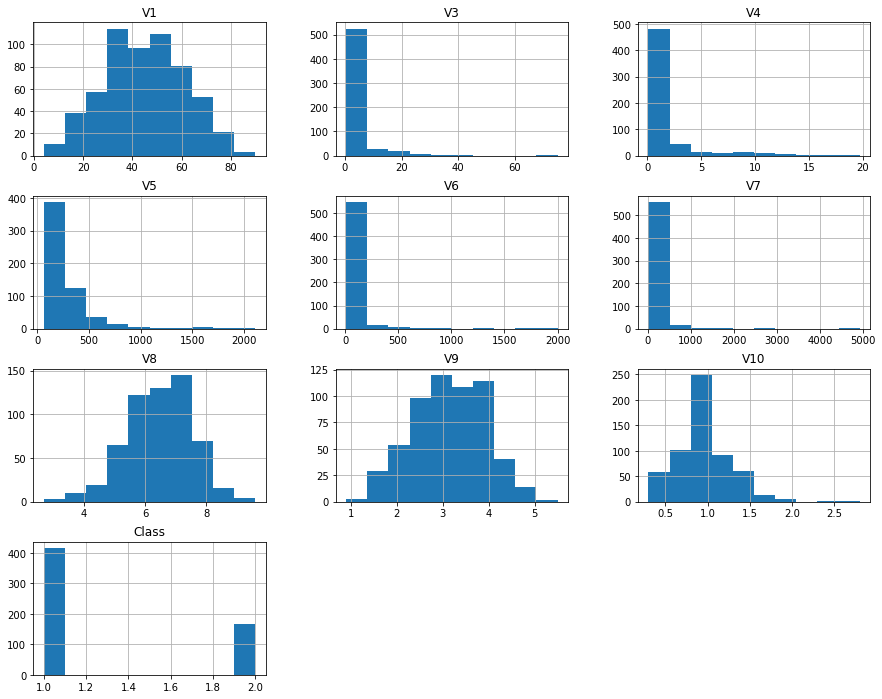

In [9]:
df.hist(figsize = (15, 12));

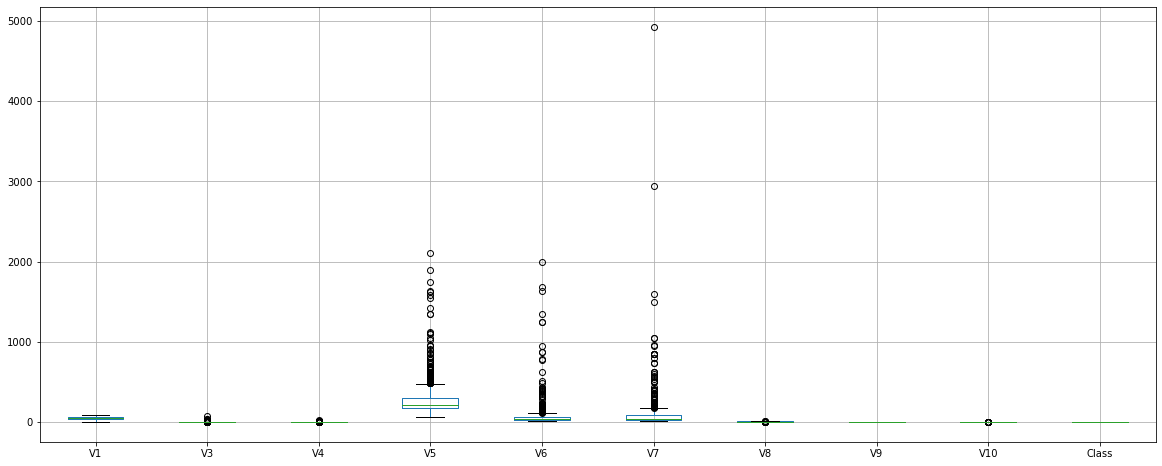

In [10]:
df.boxplot(figsize = (20, 8));

In [11]:
# correlação da variável target com as demais features
df.corr()['Class']

V1      -0.137351
V3      -0.220208
V4      -0.246046
V5      -0.184866
V6      -0.163416
V7      -0.151934
V8       0.035008
V9       0.161388
V10      0.162319
Class    1.000000
Name: Class, dtype: float64

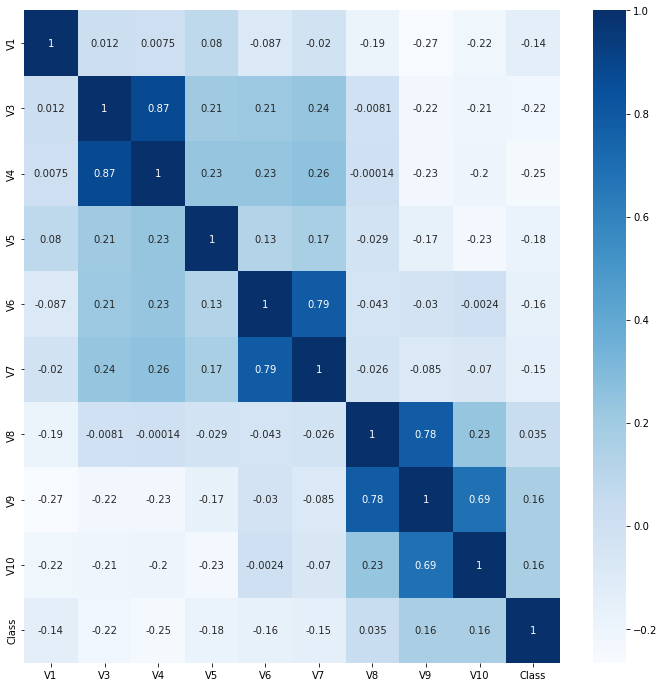

In [12]:
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', ax = ax);

## Data Preparation

In [13]:
# Verificando os tipos de dados
df.dtypes

V1         int64
V2        object
V3       float64
V4       float64
V5         int64
V6         int64
V7         int64
V8       float64
V9       float64
V10      float64
Class      int64
dtype: object

In [14]:
# Verificando se há dados faltantes
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
Class    0
dtype: int64

## Pré Processamento

In [15]:
# renomeando colunas

#df.rename(columns = {'V1': 'age', 
#           'V2':'gender', 
#           'V3':'total_bilirubin', 
#           'V4':'direct_bilirubin', 
#           'V5':'alkphos_alkaline_phosphatase', 
#           'V6':'sgpt_alanine_aminotransferase', 
#           'V7':'sgot_aspartate_aminotransferase', 
#           'V8':'total_proteins', 
#           'V9':'albumin', 
#           'V10':'A/G'},inplace = True)

In [16]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Class'], dtype='object')

In [17]:
new_gender = {'Female': 0,
              'Male': 1}

#substituindo os valores categóricos pelo mapeamento
df['V2'] = df['V2'].map(new_gender)

#check
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning

In [18]:
# define a matriz de variáveis explicativas e a variável target
# variáveis explicativas
X = df.drop(columns = 'Class')
# variável target
y = df['Class']


In [19]:
# separa os dados em treino e teste
seed = 5762
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = seed,
                                                   )

In [20]:
# shape dos arrays antes do split
X.shape, y.shape

((583, 10), (583,))

In [21]:
# verifica o shape dos arrays criados
X_train.shape, y_train.shape,X_test.shape, X_train.shape

((408, 10), (408,), (175, 10), (408, 10))

## Feature Selection

In [22]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [23]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.12572581 0.01906218 0.10158317 0.08539391 0.14802467 0.13341777
 0.13485417 0.08199227 0.09475724 0.07518881]


In [24]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns, # passado na criação do dataframe - diabetes
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
V5,0.148025
V7,0.134854
V6,0.133418
V1,0.125726
V3,0.101583
V9,0.094757
V4,0.085394
V8,0.081992
V10,0.075189
V2,0.019062


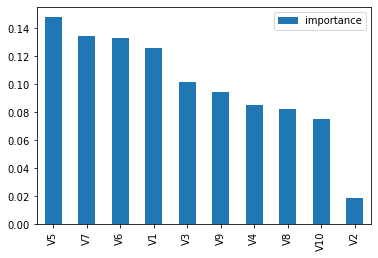

In [25]:
# visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar');

In [26]:
#definindo o tipo de validacao cruzada e o numero de folds
cv_strat1 = StratifiedKFold(n_splits = 10)

#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

#definindo hiperparâmetros
distributions = dict(kernel = ['sigmoid', 'poly', 'rbf'], 
                     C = uniform(loc=1, scale=10))

#instânciando meu classificador
classifier = SVC()

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
random_cv = RandomizedSearchCV(classifier, distributions, cv = cv_strat1, scoring = f1, random_state = 5762, n_iter = 5)
random_cv.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF05EEB9D0>,
                                        'kernel': ['sigmoid', 'poly', 'rbf']},
                   random_state=5762, scoring=make_scorer(f1_score))

In [27]:
#vamos olhar para os melhores resultados encontrados pelo RandomizeSearch
print('Melhor resultado f1:', random_cv.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', random_cv.best_params_)
print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo RandomizedSearch: \n', random_cv.best_estimator_)

Melhor resultado f1: 0.832818081808181


Melhor configuração de hiperparâmetros: {'C': 3.996689355015553, 'kernel': 'poly'}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo RandomizedSearch: 
 SVC(C=3.996689355015553, kernel='poly')


In [28]:
#definindo o tipo de validacao cruzada e o numero de folds
cv_strat2 = StratifiedKFold(n_splits = 10)

#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

#definindo hiperparâmetros
distributions1 = dict(n_estimators = randint(10, 1000),
                      bootstrap = [True, False],
                      criterion = ['gini', 'entropy'])

#instânciando meu classificador
classifier1 = RandomForestClassifier()

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
random_cv1 = RandomizedSearchCV(classifier1, distributions1, cv = cv_strat2, scoring = f1, random_state = 5762, n_iter = 5)
random_cv1.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF05F077C0>},
                   random_state=5762, scoring=make_scorer(f1_score))

In [29]:
#vamos olhar para os melhores resultados encontrados pelo RandomizeSearch
print('Melhor resultado f1:', random_cv1.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', random_cv1.best_params_)
print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo RandomizedSearch: \n', random_cv1.best_estimator_)

Melhor resultado f1: 0.7924642607551994


Melhor configuração de hiperparâmetros: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 488}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo RandomizedSearch: 
 RandomForestClassifier(n_estimators=488)
